In [155]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import scipy.optimize
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime as dt

amp20=np.loadtxt('20dBtxt.txt').T
amp40=np.loadtxt('40dBtxt.txt').T
f20=amp20[0]
f40=amp40[0]
g20=amp20[1]
g40=amp40[1]
phase20=amp20[2]
phase40=amp40[2]
diff1=np.loadtxt('diff_1.txt').T
diff2=np.loadtxt('diff_2.txt').T
diff3=np.loadtxt('differ_3.txt').T
diff4=np.loadtxt('differ_4.txt').T
c1=diff1[2][diff1[2]<0]
c2=diff1[2][diff1[2]>0]-360
phase1=np.concatenate([c1,c2 ], axis=0)
c1=diff2[2][diff2[2]<0]
c2=diff2[2][diff2[2]>0]-360
phase2=np.concatenate([c1,c2 ], axis=0)
c1=diff3[2][diff3[2]<0]
c2=diff3[2][diff3[2]>0]-360
phase3=np.concatenate([c1,c2 ], axis=0)
c1=diff4[2][diff4[2]<0]
c2=diff4[2][diff4[2]>0]-360
phase4=np.concatenate([c1,c2 ], axis=0)
def coodinate_sort(x,y,a,b):
    print('指定されたx座標に近いプロット:x;{0},y;{1}'.format(a[(0.95*x<a)&(a<1.1*x)],b[(0.95*x<a)&(a<1.1*x)]))
    print('指定されたy座標に近いプロット:x;{0},y;{1}'.format(a[(0.95*y<b)&(b<1.05*y)],b[(0.95*y<b)&(b<1.05*y)]))
diff3_step =np.loadtxt("diff3_step.txt").T
diff4_step =np.loadtxt("diff4_step.txt").T

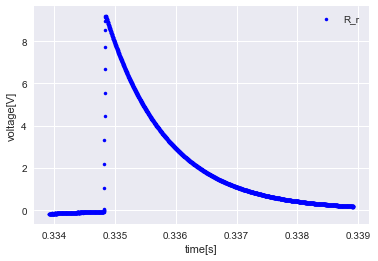

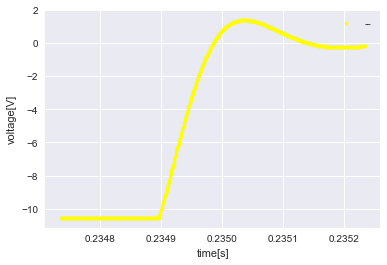

In [156]:
#plt.xscale("log")

plt.plot(diff3_step[0]*0.000001,diff3_step[1],'.',label="R_r",color="blue")
#plt.plot(diff4_step[0],diff4_step[1],'.',label="--",color="yellow")
#plt.plot(diff2[0],diff2[2],'.',label="20dB",color="green")
plt.xlabel("time[s]")
plt.ylabel("voltage[V]")
#plt.axhline(37,ls='-',label="40-3[dB]")
#plt.axhline(17,ls='-',label="20-3[dB]",color='red')
#plt.axvline(x=63095,ls='--',color='red')
#plt.axvline(x=8912,ls='--')
plt.legend()
file1="A2-3.png"
plt.savefig(file1)
plt.show()
plt.plot(diff4_step[0]*0.000001,diff4_step[1],'.',label="--",color="yellow")
#plt.plot(diff4_step[0],diff4_step[1],'.',label="--",color="yellow")
#plt.plot(diff2[0],diff2[2],'.',label="20dB",color="green")
plt.xlabel("time[s]")
plt.ylabel("voltage[V]")
#plt.axhline(37,ls='-',label="40-3[dB]")
#plt.axhline(17,ls='-',label="20-3[dB]",color='red')
#plt.axvline(x=63095,ls='--',color='red')
#plt.axvline(x=8912,ls='--')
plt.legend()
file1="A2-3-2.png"
plt.savefig(file1)
plt.show()

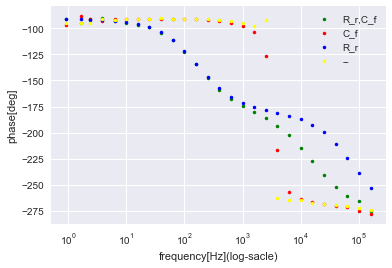

In [157]:
plt.xscale("log")
plt.plot(diff1[0],phase1,'.',label="R_r,C_f",color="green")
plt.plot(diff2[0],phase2,'.',label="C_f",color="red")
plt.plot(diff3[0],phase3,'.',label="R_r",color="blue")
plt.plot(diff4[0],phase4,'.',label="--",color="yellow")
#plt.plot(diff2[0],diff2[2],'.',label="20dB",color="green")
plt.xlabel("frequency[Hz](log-sacle)")
plt.ylabel("phase[deg]")
#plt.axhline(37,ls='-',label="40-3[dB]")
#plt.axhline(17,ls='-',label="20-3[dB]",color='red')
#plt.axvline(x=63095,ls='--',color='red')
#plt.axvline(x=8912,ls='--')
plt.legend()
file1="A2-2.png"
plt.savefig(file1)
plt.show()

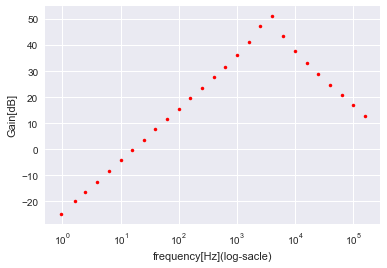

In [158]:
plt.xscale("log")
plt.plot(diff2[0],diff2[1],'.',label="20dB",color="red")
plt.xlabel("frequency[Hz](log-sacle)")
plt.ylabel("Gain[dB]")
#plt.axhline(37,ls='-',label="40-3[dB]")
#plt.axhline(17,ls='-',label="20-3[dB]",color='red')
#plt.axvline(x=63095,ls='--',color='red')
#plt.axvline(x=8912,ls='--')
plt.show()

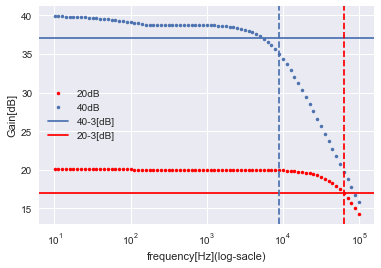

In [159]:
plt.xscale("log")
plt.plot(f20,g20,'.',label="20dB",color="red")
plt.plot(f40,g40,'.',label='40dB')
plt.xlabel("frequency[Hz](log-sacle)")
plt.ylabel("Gain[dB]")
plt.axhline(37,ls='-',label="40-3[dB]")
plt.axhline(17,ls='-',label="20-3[dB]",color='red')
plt.axvline(x=63095,ls='--',color='red')
plt.axvline(x=8912,ls='--')
#plt.axvline(x=100000,ls='--',color='red')
#plt.axvline(x=25118,ls='--',color='blue')
plt.legend()
file1="A2.png"
plt.savefig(file1)
plt.show()

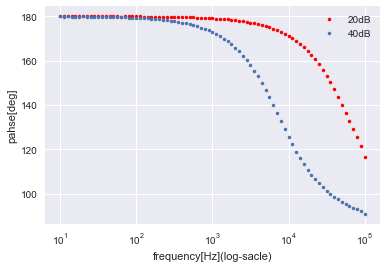

In [160]:
plt.xscale("log")
plt.plot(f20,phase20,'.',label="20dB",color="red")
plt.plot(f40,phase40,'.',label='40dB')
plt.xlabel("frequency[Hz](log-sacle)")
plt.ylabel("pahse[deg]")
#plt.axhline(y=135,ls='--',label='135deg',color='black')
#plt.axvline(x=63095,ls='--',color='red')
#plt.axvline(x=8912,ls='--',color='blue')
plt.legend()
file1="A2_1.png"
plt.savefig(file1)
plt.show()

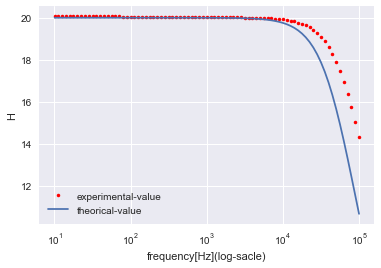

In [161]:
omega=f20
omega_p=63095

A=20/(1+f20**2/omega_p**2)**0.5
plt.xscale('log')
plt.plot(f20,g20,'.',label='experimental-value',color="red")
plt.plot(f20,A,'-',label='theorical-value')
plt.xlabel("frequency[Hz](log-sacle)")
plt.ylabel("H")
#plt.xlim([10000,100000])
plt.legend()
file1="A2_1.png"
plt.savefig(file1)
plt.show()

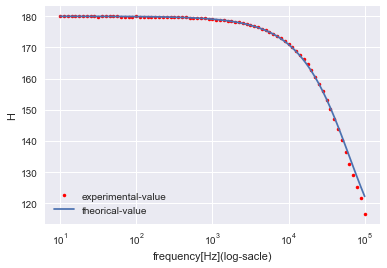

In [162]:
omega=f20
omega_p=63095

argA=(np.pi-np.arctan(omega/omega_p))*180/np.pi
plt.xscale('log')
plt.plot(f20,phase20,'.',label='experimental-value',color="red")
plt.plot(f20,argA,'-',label='theorical-value')
plt.xlabel("frequency[Hz](log-sacle)")
plt.ylabel("H")
#plt.xlim([10000,100000])
plt.legend()
file1="A2_1.png"
plt.savefig(file1)
plt.show()